# Домашнее задание №2. Дескриптивный анализ данных

**Цель работы**: приобрести опыт решения практических задач по анализу данных, таких как загрузка, трансформация, вычисление простых статистик и визуализация данных в виде графиков и диаграмм, посредством языка программирования Python

## Вариант
Чтобы узнать свой вариант, введите Вашу фамилию в соответствующее поле ниже и запустите ячейку:

In [122]:
surname = "Карузин"  # Ваша фамилия

if not surname:
    raise Exception('Необходимо указать фамилию!')

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
VARIANT =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1 - вариант: ", VARIANT % 5 + 1)
print("задача № 2 - вариант: ", VARIANT % 4 + 1)

Задача № 1 - вариант:  1
задача № 2 - вариант:  2


## Задание 1. Анализ индикаторов качества государственного управления (The Worldwide Government Indicators, WGI)


В качестве индикатора далее необходимо использовать контроль над коррупцией (Control of Corruption) и его показатели `rank` и `estimate`

- Набор данных:
    - [WGI](data/wgidataset.xlsx)
    - [Регионы](data/regions.xlsx)
- [Описание WGI](http://info.worldbank.org/governance/wgi/)

⚠️ **Замечание.** Исходный файл с данными редактировать нельзя.

1. Загрузите данные в DataFrame и сохраните в `DF_WGI`
2. Отсортируйте данные по убыванию индекса DataFrame и сохраните в `DF_SORTED`
3. Отобразите данные по индексу WGI за 2022 год в виде горизонтального столбчатого графика (`rank`). Примерный вид графика приведен ниже

![](img/cpi_2016_.png)

4. Сформируйте DataFrame из исходного для региона в соответствии с Вашим вариантом и сохраните в `DF_REGION`
    - Вариант 1. Asia Pacific
    - Вариант 2. Americas
    - Вариант 3. Europe and Central Asia
    - Вариант 4. Middle East and North Africa
    - Вариант 5. Sub Saharan Africa

5. Выведите данные DataFrame'a
6. Постройте графики индекса WGI за 1996-2022 для стран своего региона (`estimate`). Примерный вид графика приведен ниже

  ![](img/fig_springfield_region.png)

7. Найдите страны с наибольшим и наименьшим значением WGI Вашего варианта региона за 2022 год (`estimate`). Запишите эти страны в один DataFrame `DF_MINMAX` с соответствующими отметками

    ⚠️ **Замечание.** У нескольких стран может быть одна и та же позиция в рейтинге из-за одинаковых значений индекса

8. Определите средние значения региона за каждый год в период с 1996 по 2022 (`estimate`) и сохраните их в Series `S_MEANS` только из средних значений для каждого года

9. Постройте графики индекса WGI за 1996-2022 для стран своего региона и выделите страны с наибольшим и наименьшим значением WGI за 2022 год, а также отобразите среднее значение по региону и РФ. Примерный вид графика приведен ниже

![](img/fig_springfield_region_comb.png)

10. Определите, как изменилось значение показателя `rank` с 1996 по 2022 (`rank`) ($2022 - 1996$)

11. Выведите таблицу для ***Вашего варианта*** (WGI - `rank`) и сохраните в таблицу `RES_TABLE`

|             | Region | Country | Rank 1996 | Rank 2022 | Difference |
| ----------- | ------ | ------- | --------- | --------- | ---------- |
| mean_2022   | -      | -       | -         | -         | -          |
| max_2022    | -      | -       | -         | -         | -          |
| min_2022    | -      | -       | -         | -         | -          |
| Russia_2022 | -      | -       | -         | -         | -          |

**⚠️Примечание!** В графе `Country` строки `mean_2022` необходимо оставить прочерк `-`

12. Отобразите диаграмму размаха (`boxplot`) индекса WGI за 2022 для всех стран и для каждого региона в отдельности (на одном графике) (`estimate`)

## Решение

Чтение данных из таблицы, создание датафрейма `DF_WGI`.

In [123]:
import pandas as pd

FILE_PATH = 'data/wgidataset.xlsx' # путь к таблице WGIdataset.xlsx
SHEET_NAME = 'ControlofCorruption' # название нужного листа в таблице

header_rows = [13, 14] # строки заголовка

# чтение таблицы, изменение названий полей
DF_WGI = pd.read_excel(FILE_PATH, sheet_name = SHEET_NAME, header = header_rows)\
    .rename(columns = {'Basic': '', 'Country/Territory': 'Country'}) # переименовываем столбцы

DF_WGI.head()

1996                                         \
       Country Code  Estimate    StdErr NumSrc       Rank      Lower   
0        Aruba  ABW       NaN       NaN    NaN        NaN        NaN   
1      Andorra  ADO  1.318143  0.480889    1.0  87.096771  72.043015   
2  Afghanistan  AFG -1.291705  0.340507    2.0   4.301075   0.000000   
3       Angola  AGO -1.167702  0.262077    4.0   9.677420   0.537634   
4     Anguilla  AIA       NaN       NaN    NaN        NaN        NaN   

                  1998            ...   2021                                   \
       Upper  Estimate    StdErr  ... NumSrc       Rank      Lower      Upper   
0        NaN       NaN       NaN  ...    2.0  78.571426  62.857143  89.047623   
1  96.774193  1.334759  0.453149  ...    1.0  88.571426  70.000000  96.666664   
2  27.419355 -1.176012  0.324013  ...    8.0  12.380953   4.761905  20.952381   
3  27.419355 -1.180451  0.227055  ...   10.0  29.047619  19.523809  40.476189   
4        NaN       NaN       NaN  ...    1.0  73.333336  50.952381  89.047623   

       2022                                                    
   Estimate    StdErr NumSrc       Rank      Lower      Upper  
0  0.756785  0.317250    2.0  77.830185  60.849056  88.679245  
1  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  
2 -1.183776  0.173320    8.0  12.264151   4.716981  20.283018  
3 -0.601941  0.160003   10.0  30.660378  21.226416  43.396225  
4  1.270204  0.463415    1.0  88.679245  68.396225  97.169815  

[5 rows x 146 columns]

Создание `DF_SORTED`.

In [124]:
# сортировка по индексу WGI за 2022 год, заполнение пустых мест нулями
DF_SORTED = DF_WGI.fillna(0).sort_index(ascending = 0).copy()
DF_SORTED.head()

1996                                         \
              Country Code  Estimate    StdErr NumSrc       Rank      Lower   
213          Zimbabwe  ZWE -0.278847  0.244907    5.0  47.849461  30.645161   
212            Zambia  ZMB -0.840641  0.262077    4.0  24.731182   5.913979   
211  Congo, Dem. Rep.  ZAR -1.647852  0.315914    3.0   0.000000   0.000000   
210      South Africa  ZAF  0.732927  0.210325    6.0  76.344086  66.129036   
209            Serbia  SRB -1.140072  0.262077    4.0  11.827957   0.537634   

                    1998            ...   2021                        \
         Upper  Estimate    StdErr  ... NumSrc       Rank      Lower   
213  60.752689 -0.504802  0.198134  ...   12.0  10.000000   4.285714   
212  41.397850 -0.853156  0.227055  ...   12.0  25.714285  17.619047   
211  12.365591 -1.416679  0.310343  ...   11.0   4.285714   0.000000   
210  81.182793  0.638809  0.188628  ...   11.0  53.809525  46.190475   
209  29.032259 -1.195605  0.191027  ...    9.0  35.714287  26.190475   

                    2022                                                    
         Upper  Estimate    StdErr NumSrc       Rank      Lower      Upper  
213  17.619047 -1.255139  0.151262   12.0   8.490566   4.245283  17.924528  
212  33.809525 -0.529200  0.152557   12.0  34.433964  23.584906  45.754719  
211   6.666667 -1.544474  0.149016   12.0   3.301887   0.471698   7.075472  
210  60.000000 -0.319765  0.157883   11.0  44.811321  31.603773  52.358490  
209  48.095238 -0.456188  0.158030    9.0  35.377357  24.528301  48.113209  

[5 rows x 146 columns]

Выделение данных за 2022 год.

In [125]:
# связываем названия стран и данные за 2022 по индексу, создаём датасет, сортируем по рейтингу
df_2022 = DF_WGI.fillna(0).sort_values((2022, 'Rank'), ascending = 0).copy()
# слединяем названия стран и их коды с данными
df_2022 = df_2022[''].join(df_2022[2022])
df_2022.head()

,Country,Code,Estimate,StdErr,NumSrc,Rank,Lower,Upper
54,Denmark,DNK,2.402744,0.162981,10.0,100.000000,98.584908,100.000000
63,Finland,FIN,2.246978,0.162981,10.0,99.528305,96.698112,100.000000
147,New Zealand,NZL,2.163334,0.172786,8.0,99.056602,95.754715,100.000000
169,Singapore,SGP,2.094724,0.153310,10.0,98.584908,95.754715,99.528305
144,Norway,NOR,2.067760,0.179826,7.0,98.113205,95.283020,99.528305


Создание графика. График со всеми странами сохранен в "Corruption Control Rate - 2022.png".

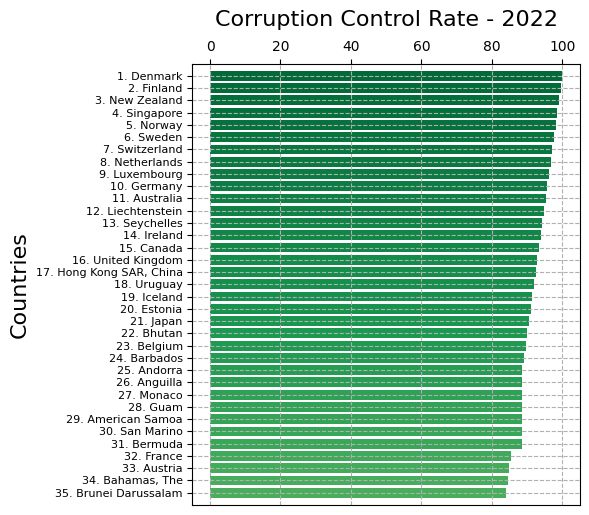

In [126]:
# подключаем библиотеки
import matplotlib.pyplot as plt 
import seaborn as sns

values = df_2022['Rank'] # извлекаем значения рейтинга стран из датафрейма 
countries = df_2022['Country'] # извлекаем названия стран из датафрейма

countries = [f"{i}. {c}" for i, c in enumerate(countries, 1)] # добавляем странам нумерацию

num_countries = 35# число выводимых стран
num_countries = min(num_countries, len(countries)) # проверка 

plt.figure(figsize = (6 , num_countries * 0.15)) # корректируем размер графика

plt.grid(linestyle='--') # добавляем сетку

plt.xlim(left=min(values) - 5, right=max(values) + 5) # добавляем отступы от оси x с обеих сторон
plt.ylim(-1, min(len(countries), num_countries)) # добавляем отступы от оси y

colors = sns.color_palette("RdYlGn_r", len(values)) # создание палитры цветов от зелёного к красному
plt.barh(countries[:num_countries], values[:num_countries], color = colors) # создание горизонтальной столбчатой диаграммы

plt.yticks(fontsize = 8) # корректировка размера шрифта

plt.gca().invert_yaxis() # разворачиваем ось y
plt.xlabel('Corruption Control Rate - 2022', fontsize = 16, labelpad = 10) # добавляем подпись к оси x
plt.ylabel('Countries', fontsize = 16) # добавляем подпись к оси y

plt.gca().xaxis.tick_top()                # меняем позицию оси x
plt.gca().xaxis.set_label_position('top')

plt.tight_layout()
plt.show()

Создание датафрейма `DF_REGION`.

In [127]:
PATH_COUNRTY_CODES = 'data/regions.xlsx' # путь к таблице regions.xlsx

DF_CODES = pd.read_excel(PATH_COUNRTY_CODES, header = 0) # чтение таблицы regions.xlsx

asia_pacific_countries = DF_CODES[DF_CODES['Region'] == 'AP'].copy() # фильтарция стран по полю Region

# отбор стран из азии и тихоокеанского региона
DF_REGION = DF_SORTED[DF_SORTED[('', 'Code')].isin(asia_pacific_countries['Code'])].copy() 
DF_REGION.head()
asia_pacific_countries.head(8)


,Country,Code,Region
0,Afghanistan,AFG,AP
6,Australia,AUS,AP
11,Bangladesh,BGD,AP
16,Bhutan,BTN,AP
25,Cambodia,KHM,AP
31,China,CHN,AP
54,Fiji,FJI,AP
70,Hong Kong,HKG,AP


Формирование датафрейма из значенией `estimate` для каждой страны выбранного региона от года к году.

In [128]:
# присоединяем к таблице с названиями стран таблицу с их значениями estimate
df_estimate = DF_REGION[[('', 'Country')]].join(DF_REGION.loc[:, pd.IndexSlice[:, 'Estimate']]).sort_values(('', 'Country')).copy() 

df_estimate.columns = df_estimate.columns.droplevel(1) # удаление комплексного заголовка
df_estimate.rename(columns={'':'Country'}, inplace=True) # изменение названия столбца
df_estimate.head()


,Country,1996,1998,2000,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,Afghanistan,-1.291705,-1.176012,-1.271724,-1.251137,-1.344180,-1.350647,-1.447252,-1.446292,-1.613251,...,-1.445908,-1.364743,-1.354240,-1.540353,-1.531910,-1.502881,-1.419499,-1.493700,-1.152327,-1.183776
12,Australia,1.877356,1.798130,1.862088,1.761436,1.895287,2.005869,1.942668,1.950813,2.000873,...,1.777870,1.849465,1.841354,1.772004,1.752321,1.767378,1.788173,1.632956,1.707646,1.764490
19,Bangladesh,-0.969682,-0.773011,-1.212083,-1.449087,-1.541721,-1.597115,-1.406467,-1.442983,-1.063240,...,-0.893825,-0.892130,-0.844026,-0.886878,-0.858939,-0.926947,-1.016994,-1.003677,-0.985861,-1.075527
31,Bhutan,0.942838,0.883641,0.574340,0.449922,1.087011,0.893403,0.871917,0.854817,0.928756,...,0.912420,1.306129,0.989678,1.091020,1.529063,1.590518,1.572266,1.618237,1.507121,1.514259
101,Cambodia,-1.019842,-0.988312,-0.967183,-0.990784,-0.989836,-1.058346,-1.223740,-1.260386,-1.151690,...,-1.063722,-1.146750,-1.153124,-1.301331,-1.317362,-1.356795,-1.323166,-1.271122,-1.197489,-1.241499


Создания набора визуальных особенностей для большей читаемости графика.

In [129]:
# создание палитры цветов
palette = sns.color_palette('Spectral', n_colors = df_estimate.shape[0])

# создание словаря, связывающего страну с уникальным цветом
country_colors = {country: color for country, color in zip(df_estimate['Country'], palette)} 
markers = ['o', 'X', 'v', '^', '*'] # отметки точек
linestyles = ['-', '--', ':'] # типы линий

Создание графика.

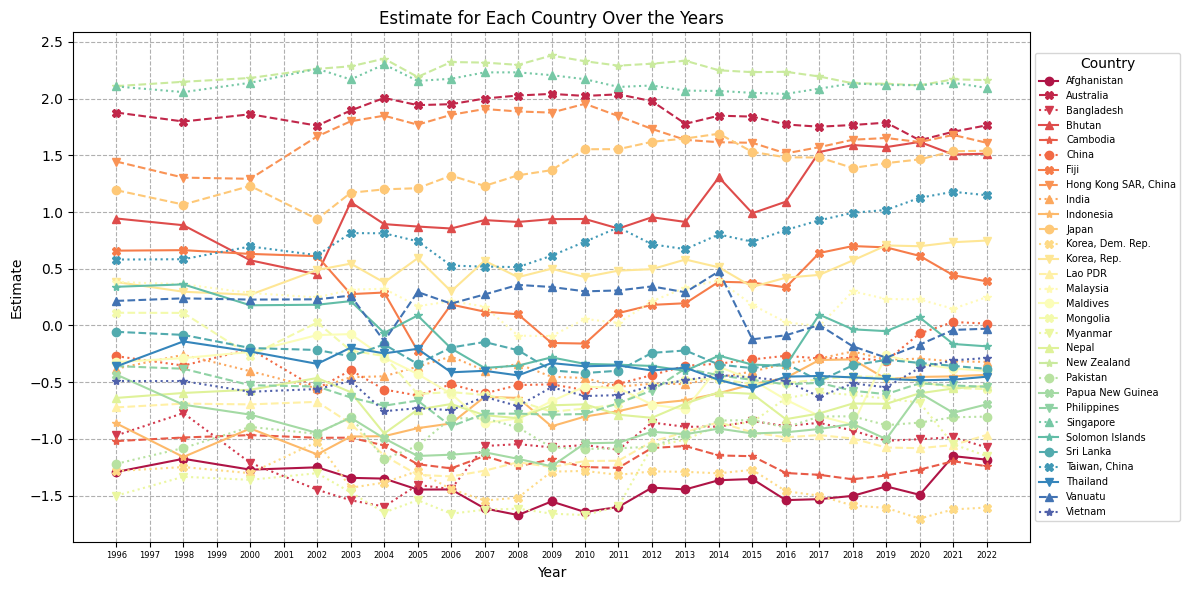

In [130]:
years = df_estimate.columns[1:] # список годов, по которым велось составление рейтинга

plt.figure(figsize=(12, 6)) # настройка размера графика

# перебор всех стран списка, нумарация стран 
for idx, (_, content) in enumerate(df_estimate.iterrows()):
    
    country = content['Country'] # извлечение названия страны
    estimates = content[1:] # извлечение значений estimate

    # создание графика страны
    plt.plot(years, estimates,             
        linestyle=linestyles[idx % len(linestyles)], 
        marker=markers[idx % len(markers)],          
        label=country,
        color=country_colors[country]                
    )

# настройка визуальных параметров графика
plt.title('Estimate for Each Country Over the Years')
plt.xlabel('Year')
plt.ylabel('Estimate')
plt.legend(title = 'Country', fontsize = 7,loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(min(df_estimate.columns[1:]), max(df_estimate.columns[1:]) + 1), fontsize = 6)
plt.grid(True, linestyle = '--')
plt.tight_layout()
plt.show()

Создание датафрейма из страны с наибольшим и наименьшим значением `estimate`.

In [131]:
# определение страны с наибольшим значением estimate в 2022 году
max_estimate_idx = DF_REGION.loc[:, (2022, 'Estimate')].idxmax() 
# определение страны с наименьшим значением estimate в 2022 году
min_estimate_idx = DF_REGION.loc[:, (2022, 'Estimate')].idxmin() 

# создание датафрейма DF_MINMAX
DF_MINMAX = DF_REGION.loc[[max_estimate_idx, min_estimate_idx], [('', 'Country')]].copy()
DF_MINMAX.columns = ['Country']

DF_MINMAX

,Country
147,New Zealand
157,"Korea, Dem. Rep."


Формирования датафрейма из средних значений по годам.

In [132]:
# создание массива средних значение estimate за каждый год для стран азии и тихоокеанского региона
means = df_estimate[years].mean()

# преобразование массива в датафрейм
S_MEANS = means
S_MEANS.head()


1996    0.005390
1998    0.004409
2000   -0.035114
2002   -0.043584
2003   -0.024761
dtype: float64

Создание датафрейма из данных по Российской Федерации.

In [133]:
# извлечение значение estimate за каждый год
RF_estimates = DF_WGI[DF_WGI[('', 'Country')] == 'Russian Federation'].\
    loc[:, pd.IndexSlice[:, 'Estimate']].values.reshape(-1).copy() # выделяется поле estimate, двумерный массив преобразуется в одномерный

df_RF = pd.DataFrame(data=RF_estimates, columns = ['Estimate'], index = years)
df_RF.head()

,Estimate
1996,-1.053342
1998,-0.954374
2000,-0.943414
2002,-0.954848
2003,-0.783092


Создание графика.

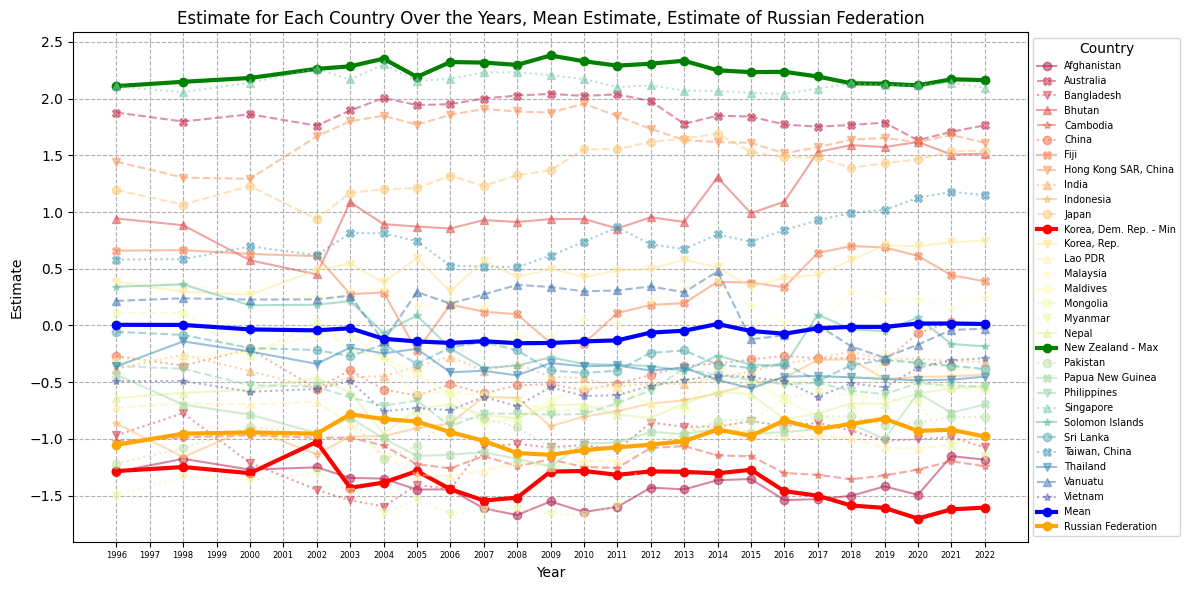

In [134]:
plt.figure(figsize=(12, 6))

for idx, (i, content) in enumerate(df_estimate.iterrows()):
    country = content['Country']

    # проверка на наличие страны в датафрейме DF_MINMAX
    if country == DF_MINMAX.iloc[1].values[0]:
        # выделяем страну с минимальным значением
        plt.plot(years, content[1:],
                 color = 'red', marker = 'o', label = f'{country} - Min', linewidth = 3)
    elif country == DF_MINMAX.iloc[0].values[0]:
        # выделяем страну с максимальным значением
        plt.plot(years, content[1:],
                 color = 'green', marker = 'o', label = f'{country} - Max', linewidth = 3)
    else:
        plt.plot(years, content[1:],             
                 linestyle = linestyles[idx % len(linestyles)], 
                 marker = markers[idx % len(markers)],          
                 label = country,
                 color = country_colors[country],
                 alpha = 0.5
    )


# отдельно отображаем линию средних значений
plt.plot(years, S_MEANS.values,
         color = 'blue', marker = 'o', label = 'Mean', linewidth = 3)

# отдельно отображаем линию Российской Федерации
plt.plot(years, df_RF['Estimate'],
         color = 'orange', marker = 'o', label = 'Russian Federation', linewidth = 3)

plt.title('Estimate for Each Country Over the Years, Mean Estimate, Estimate of Russian Federation')
plt.xlabel('Year')
plt.ylabel('Estimate')
plt.legend(title = 'Country', fontsize = 7,loc='center left', bbox_to_anchor=(1, 0.5))

plt.xticks(range(min(df_estimate.columns[1:]), max(df_estimate.columns[1:]) + 1), fontsize = 6)
plt.grid(True, linestyle = '--')
plt.tight_layout()
plt.show()

Получение средних значений поля `Rank` за 1996-й и 2022-й годы.

In [135]:
mean_1996 = DF_REGION[1996, 'Rank'].mean()
mean_2022 = DF_REGION[2022, 'Rank'].mean()
print(mean_1996, mean_2022)

50.197132702668505 49.16666693687439


Создание датафрейма с данными по странам с максимальным и минимальным значением `Rank` за 2022 год.

In [136]:
# определение индексов стран с наименьшим и наибольшим значением Rank
max_rank_idx = DF_REGION.loc[:, (2022, 'Rank')].idxmax()
min_rank_idx = DF_REGION.loc[:, (2022, 'Rank')].idxmin() 

# создание пустого датафрейма, запись названий полей
df_rank = pd.DataFrame(columns = ['Region', 'Country', 'Rank 1996', 'Rank 2022', 'Difference'])

# заполнение датафрейма данными из DF_REGION по индексу
df_rank.loc['max'] = ['AP',
                         DF_REGION.loc[max_rank_idx, ('', 'Country')],
                         DF_REGION.loc[max_rank_idx, (1996, 'Rank')],
                         DF_REGION.loc[max_rank_idx, (2022, 'Rank')],
                         DF_REGION.loc[max_rank_idx, (2022, 'Rank')] - DF_REGION.loc[max_rank_idx, (1996, 'Rank')]]

df_rank.loc['min'] = ['AP',
                         DF_REGION.loc[min_rank_idx, ('', 'Country')],
                         DF_REGION.loc[min_rank_idx, (1996, 'Rank')],
                         DF_REGION.loc[min_rank_idx, (2022, 'Rank')],
                         DF_REGION.loc[min_rank_idx, (2022, 'Rank')] - DF_REGION.loc[min_rank_idx, (1996, 'Rank')]]

df_rank

,Region,Country,Rank 1996,Rank 2022,Difference
max,AP,New Zealand,97.849464,99.056602,1.207138
min,AP,"Korea, Dem. Rep.",4.838710,2.358490,-2.480219


Извлечение значений поля `Rank` за 1996-й и 2022-й годы для Российской Федерации.

In [137]:
# выделяем запись Российской Федерации
rf = DF_WGI[DF_WGI[('', 'Country')] == 'Russian Federation'].iloc[0]

# берём значения за 1996 и 2022 годы из записи
rf_1996, rf_2022 = rf[(1996, 'Rank')], rf[(2022, 'Rank')]
print(rf_1996, rf_2022)

15.053763389587402 19.339622497558594


Создание таблицы `RES_TABLE`.

In [138]:
# генерируем датафрейм через словарь
RES_TABLE = pd.DataFrame({
    'Region': ['AP', df_rank.loc['max', 'Region'], df_rank.loc['max', 'Region'], 'ECA'],
    'Country': ['-', df_rank.loc['max', 'Country'], df_rank.loc['min', 'Country'], 'Russian Federation'],
    'Rank 1996': [mean_1996, df_rank.loc['max', 'Rank 1996'], df_rank.loc['min', 'Rank 1996'], rf_1996],
    'Rank 2022': [mean_2022, df_rank.loc['max', 'Rank 2022'], df_rank.loc['min', 'Rank 2022'], rf_2022],
    'Difference': [
        mean_2022 - mean_1996,
        df_rank.loc['max', 'Difference'],
        df_rank.loc['min', 'Difference'],
        rf_2022 - rf_1996,
    ]
}, index=['mean_2022', 'max_2022', 'min_2022', 'Russia_2022'])

RES_TABLE


,Region,Country,Rank 1996,Rank 2022,Difference
mean_2022,AP,-,50.197133,49.166667,-1.030466
max_2022,AP,New Zealand,97.849464,99.056602,1.207138
min_2022,AP,"Korea, Dem. Rep.",4.838710,2.358490,-2.480219
Russia_2022,ECA,Russian Federation,15.053763,19.339622,4.285859


Создание графика.

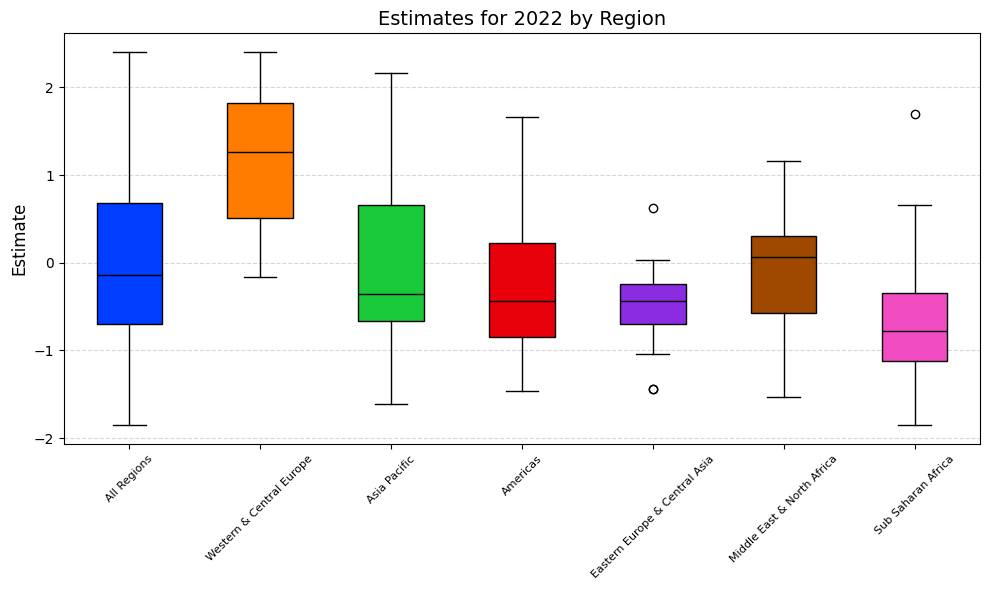

In [139]:
# создаём словарь связывающий названия регионов с их данными из датафрейма DF_SORTED
regions = {
    'All Regions': DF_SORTED,
    'Western & Central Europe': DF_SORTED[DF_SORTED[('', 'Country')].isin(DF_CODES[DF_CODES['Region'] == 'WE/EU']['Country'])],
    'Asia Pacific': DF_REGION,
    'Americas': DF_SORTED[DF_SORTED[('', 'Country')].isin(DF_CODES[DF_CODES['Region'] == 'AME']['Country'])],
    'Eastern Europe & Central Asia': DF_SORTED[DF_SORTED[('', 'Country')].isin(DF_CODES[DF_CODES['Region'] == 'ECA']['Country'])],
    'Middle East & North Africa': DF_SORTED[DF_SORTED[('', 'Country')].isin(DF_CODES[DF_CODES['Region'] == 'MENA']['Country'])],
    'Sub Saharan Africa': DF_SORTED[DF_SORTED[('', 'Country')].isin(DF_CODES[DF_CODES['Region'] == 'SSA']['Country'])]
}

# создание словаря, связывающего регионы с массивами их значений поля Estimate за 2022 год
regions_data = {region: DF_COMPANIES[(2022, 'Estimate')].values for region, DF_COMPANIES in regions.items()}

# создание графика с диаграммами размаха для каждого региона
plt.figure(figsize=(10, 6))
box = plt.boxplot(regions_data.values(), positions=range(len(regions_data)), patch_artist=True)
# параметр positions принимает значения [0, 1, 2, 3 ... ]
# параметр parch_artist отвечает за визуализацию диграмм

# настройка визуальных элементов графика
colors = sns.color_palette('bright', len(regions))

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)  # Устанавливаем цвет коробки

for median in box['medians']:
    median.set_color('black')  # Устанавливаем цвет медианы

for whisker in box['whiskers']:
    whisker.set_color('black')  # Устанавливаем цвет усов

for cap in box['caps']:
    cap.set_color('black')  # Устанавливаем цвет концов усов

# настройка визуальных элементов графика
plt.xticks(ticks=range(len(regions_data)), labels = regions_data.keys(), rotation = 45, fontsize = 8)
plt.title('Estimates for 2022 by Region', fontsize = 14)
plt.ylabel('Estimate', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha = 0.5)

plt.tight_layout()
plt.show()

## Задача 2. Анализ рынка акций

1. Загрузите данные в один dataframe из всех файлов в папке /data/stock. Все файлы имеют одинаковую структуру, в том числе наименование столбцов. В качестве значений индекса dataframe'а необходимо указать значения столбца "Date". Название столбцов должные соответствовать названию акций (имя файла без .csv), а их значения - значениям цены закрытия (столбец "Close" в файлах .csv). Сохраните DataFrame в `DF_COMPANIES`

    ⚠️ **Замечание.** Наборы данные были загружены с сайта https://finance.yahoo.com/

    ⚠️ **Замечание.** Нужна только цена закрытия

2. Рассчитайте корреляционную матрицу для всех акций и сохраните её в `DF_CORR`

3. Отобразите корреляционную матрицу в виде диаграммы. Примерный вид графика приведен ниже

  ![](img/fig_corr_matrix.png)

4. В соответствии с Вашим вариантом определите:

    - акцию с максимальной положительной корреляцией (max)
    - акцию с максимальной отрицательной корреляцией (min)
    - акцию с минимальной корреляцией (которая больше всего соответствует отсутствию какой-либо корреляции (none))

    Варианты

    - **Вариант 1.** Apple (AAPL)
    - **Вариант 2.** Netflix (NFLX)
    - **Вариант 3.** Google (GOOGL)
    - **Вариант 4.** Uber (UBER)

  Сохраните результаты в списке `LST_COMP_CORR` в указанном порядке

5. Постройте диаграммы разброса (Ваша компания - Компания с min), (Ваша компания - Компания с max), (Ваша компания - Компания с none). По `x` расположите цену вашей компании, по `y` - цену компании в паре

6. Рассчитайте среднюю цену акций для каждого месяца (исходные данные взяты с интервалом в месяц) и сохраните результат в `S_MEANS_COMP`

7. Постройте графики для акций из пункта 4 и средней из пункта 6. Примерный вид графика приведен ниже

  ![](img/fig_tw_comp.png)

## Решение

Формирование датафрейма.

In [140]:
import os

DIRECTORY = 'data/stock'

data_frames = []

for file_name in os.listdir(DIRECTORY):
    file_path = f'{DIRECTORY}/{file_name}'

    company_df = pd.read_csv(file_path, index_col='Date', usecols=['Date', 'Close']).\
        rename(columns={'Close': file_name[:-4]})
    data_frames.append(company_df)

DF_COMPANIES = pd.concat(data_frames, axis = 1)
DF_COMPANIES.head(3)

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,174.779999,153.970001,534.299988,149.573502,55.669998,24.750000,60.070000,135.303497,64.010002,36.730000,...,244.860001,81.160004,29.559999,NaN,196.259995,26.610001,312.239990,206.119995,37.400002,10.7350
2022-02-01,165.119995,151.490005,467.679993,153.563004,55.770000,22.690001,54.590000,135.057007,58.270000,34.360001,...,243.850006,75.970001,26.750000,NaN,156.190002,25.820000,290.143341,174.800003,36.029999,9.5500
2022-03-01,174.610001,171.759995,455.619995,162.997498,55.759998,23.250000,57.259998,139.067505,54.450001,36.299999,...,272.859985,82.730003,24.610001,NaN,151.020004,23.120001,359.200012,164.809998,35.680000,8.7199


Создание корреляционной матрицы.

In [141]:
DF_CORR = DF_COMPANIES.corr()
DF_CORR.head(3)

,AAPL,ABNB,ADBE,AMZN,CSCO,DBX,EBAY,GOOGL,GTLB,HPQ,...,NVDA,ORCL,PINS,SHOP,SPOT,TCOM,TSLA,TWLO,UBER,XIACY
AAPL,1.000000,0.617430,0.833129,0.665715,0.589552,0.740429,0.115591,0.806847,0.282373,0.067074,...,0.633114,0.769309,0.640294,0.465147,0.687415,0.439363,0.248385,0.042914,0.661323,0.408747
ABNB,0.617430,1.000000,0.670509,0.830690,0.594365,0.332740,0.644140,0.780440,0.460602,0.390153,...,0.649664,0.471504,0.554616,0.696599,0.753797,0.294269,0.353807,0.429915,0.680764,0.564475
ADBE,0.833129,0.670509,1.000000,0.819614,0.554172,0.816359,0.180354,0.915440,0.496556,0.081518,...,0.802739,0.785432,0.804657,0.783919,0.863827,0.533298,0.071508,0.067604,0.834611,0.697612


Создание графика корреляционной матрицы.

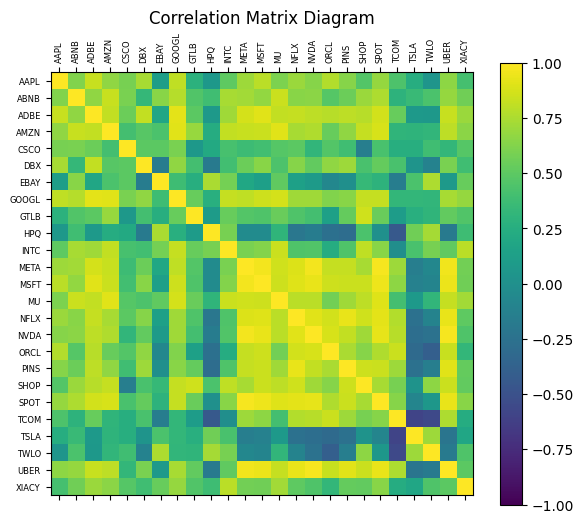

In [142]:
import matplotlib.pyplot as plt

# Создание фигуры и осей
figure = plt.figure(figsize=(6, 6))
axis = figure.add_subplot(111) # располагаем оси поверх фигуры
plt.title('Correlation Matrix Diagram')

# создаём корреляционную матрицу
corr_matrix = axis.matshow(DF_CORR, vmin=-1, vmax=1) # указываем максимальное и минимальное значение

colorbar = figure.colorbar(corr_matrix, shrink=0.8) # создаём цветововую панель справа

# настройк осей
axis.set_xticks(range(len(DF_CORR.columns))) # создание отметок на оси x числом количества компаний
axis.set_yticks(range(len(DF_CORR.index))) # создание отметок на оси y числом количества компаний
axis.set_xticklabels(DF_CORR.columns.array, rotation=90, fontsize=6) # отображение названий компаний, разворот названий на 90 градусов
axis.set_yticklabels(DF_CORR.index.array, fontsize=6) # отображение названий компаний, разворот названий

# отображение графика
plt.tight_layout()
plt.show()

Поиск компаний, цены акций которых наиболее и наименее сильно коррелируют с Netflix.

In [143]:
COMPANY = 'NFLX'

# поиск компаний с максимальной положительной и отрицательной корреляцией относительно NFLX
max_pos_corr_idx = DF_CORR.loc[DF_CORR.index != COMPANY, COMPANY].idxmax()
max_neg_corr_idx = DF_CORR.loc[DF_CORR.index != COMPANY, COMPANY].idxmin()

# здесь возводим все значения датафрейма в квадрат, чтобы найти ближайшее к нулю для NFLX
min_corr_idx = (DF_CORR ** 2).loc[DF_CORR.index != COMPANY, COMPANY].idxmin() 

# создание списка компаний
LST_COMP_CORR = [max_pos_corr_idx, max_neg_corr_idx, min_corr_idx]
LST_COMP_CORR

['UBER', 'TSLA', 'TWLO']

Создание графика рассеивания.

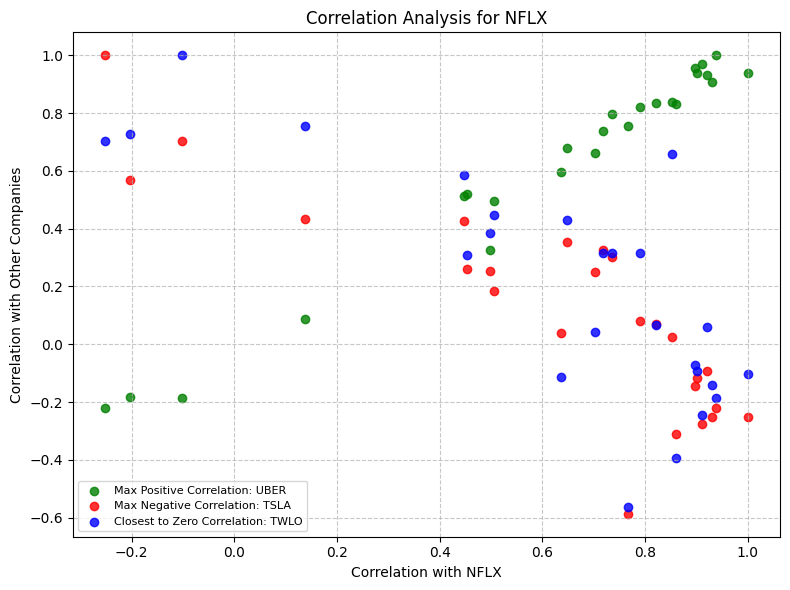

In [144]:
# создание списка кортежей для большей читаемости
correlations = [
    (max_pos_corr_idx, 'green', 'Max Positive Correlation'),
    (max_neg_corr_idx, 'red', 'Max Negative Correlation'),
    (min_corr_idx, 'blue', 'Closest to Zero Correlation')
]

# настройка размеров графика
plt.figure(figsize=(8, 6))

# создание графиков разброса
for idx, color, label in correlations:
    plt.scatter(
        x=DF_CORR[COMPANY],
        y=DF_CORR[idx],
        color=color,
        label=f'{label}: {idx}',
        alpha=0.8
    )

# настройка визуальных атрибутов графика
plt.grid(linestyle='--', alpha=0.7)
plt.xlabel(f'Correlation with {COMPANY}', fontsize=10)
plt.ylabel('Correlation with Other Companies', fontsize=10)
plt.title(f'Correlation Analysis for {COMPANY}', fontsize=12)
plt.legend(fontsize=8, loc='best')

# показ
plt.tight_layout()
plt.show()

In [145]:
S_MEANS_COMP = DF_COMPANIES.mean(axis = 1)
S_MEANS_COMP.head(3)

Date
2022-01-01    154.857167
2022-02-01    140.774723
2022-03-01    145.272287
dtype: float64

Создание графика.

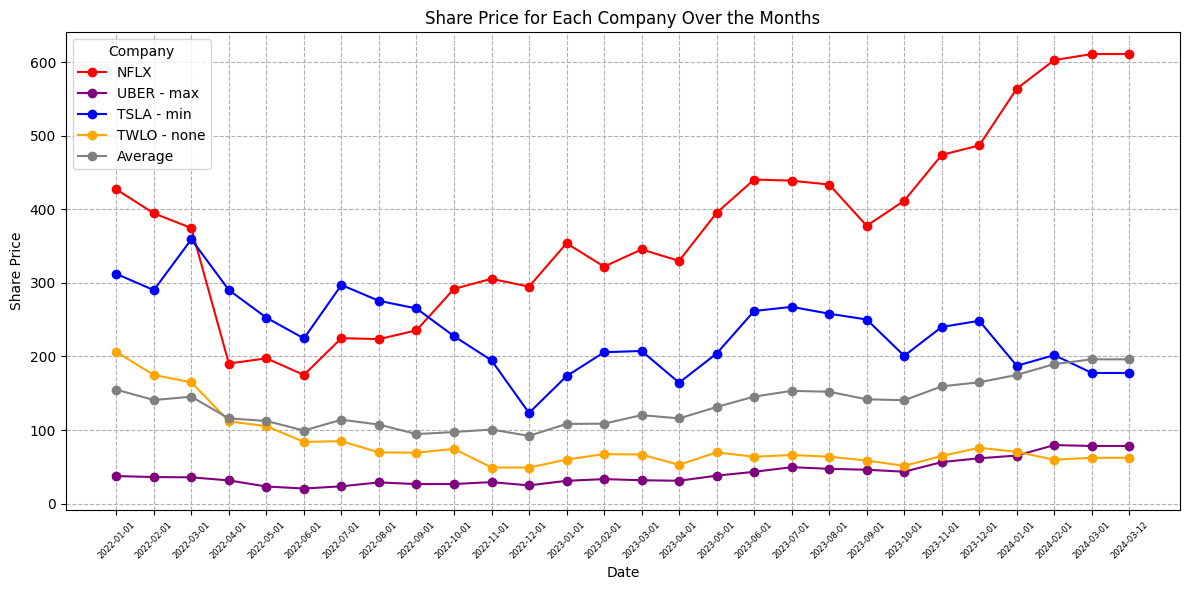

In [147]:
months = DF_COMPANIES.index # список дат, в которых брались цены акций

# список кортежей с информацией по каждой компании
companies = [
    ('NFLX', DF_COMPANIES['NFLX'], 'red'),
    ('UBER - max', DF_COMPANIES['UBER'], 'purple'),
    ('TSLA - min', DF_COMPANIES['TSLA'], 'blue'),
    ('TWLO - none', DF_COMPANIES['TWLO'], 'orange'),
    ('Average', S_MEANS_COMP, 'grey')
]

plt.figure(figsize=(12, 6)) # настройка размера графика

# создание графиков каждой компании
for company_name, data, company_color in companies:
    plt.plot(months, data,
        marker = 'o',                 
        label = company_name,
        color = company_color           
    )

# настройка визуальных элементов графика
plt.title('Share Price for Each Company Over the Months')
plt.xlabel('Date')
plt.ylabel('Share Price')
plt.legend(title = 'Company', fontsize = 10)

plt.xticks(rotation = 45, fontsize = 6)
plt.grid(True, linestyle = '--')
plt.tight_layout()
plt.show()

## Вывод
- В ходе выполнения домашнего задания были приобретены практические навыки сбора, обработки и анализа данных с помощью инструментов языка программирования Python и его библиотек.
- Удалось получить опыт работы с Pandas: были загружены и обработаны данные из .xlsx и .csv таблиц. 
- Удалось получить опыт визуализации данных с помощью библиотеки Matplotlib.
- Были проанализированы данные рейтинга Всемирного Банка по контролю коррупции, 
а также цены акций различных компаний в период с 01-01-2022 по 12-03-2024.